<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Régression Linéaire avec SciKit-Learn

Nous avons vu comment créer une ligne droite de meilleur ajustement très simple, mais élargissons maintenant considérablement notre boîte à outils pour commencer à réfléchir aux considérations de sur-entraînement (overfitting), de sous-entraînement (underfitting), d'évaluation de modèle, ainsi qu'aux features / caractéristiques multiples !

## Importations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Échantillons de données

Ces exemples de données proviennent du livre l'ISLR. Il affiche les ventes (en milliers d'unités) pour un produit particulier en fonction des budgets publicitaires (en milliers de dollars) pour la télévision, la radio et les journaux.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Élargissement des questions

Précédemment, nous avons étudié **Existe t-il une relation entre les dépenses publicitaires *totales* et les *ventes*?** ainsi que la prévision des ventes totales pour une certaine valeur de dépenses totales. Nous voulons maintenant élargir cette question à **Quelle est la relation entre chaque canal publicitaire (TV, Radio, Journaux) et les ventes?**

### Multiple Features (N-Dimensional)

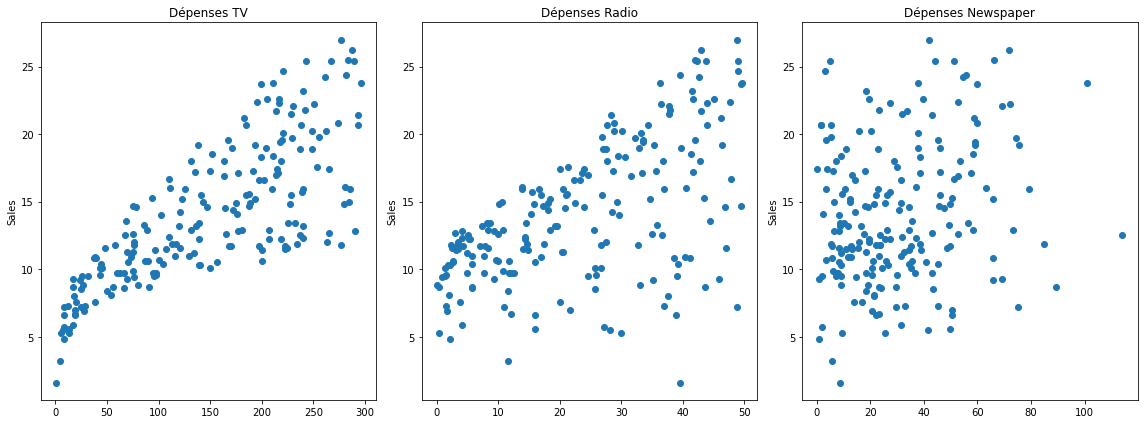

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("Dépenses TV")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Dépenses Radio")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Dépenses Newspaper");
axes[2].set_ylabel("Sales")
plt.tight_layout();

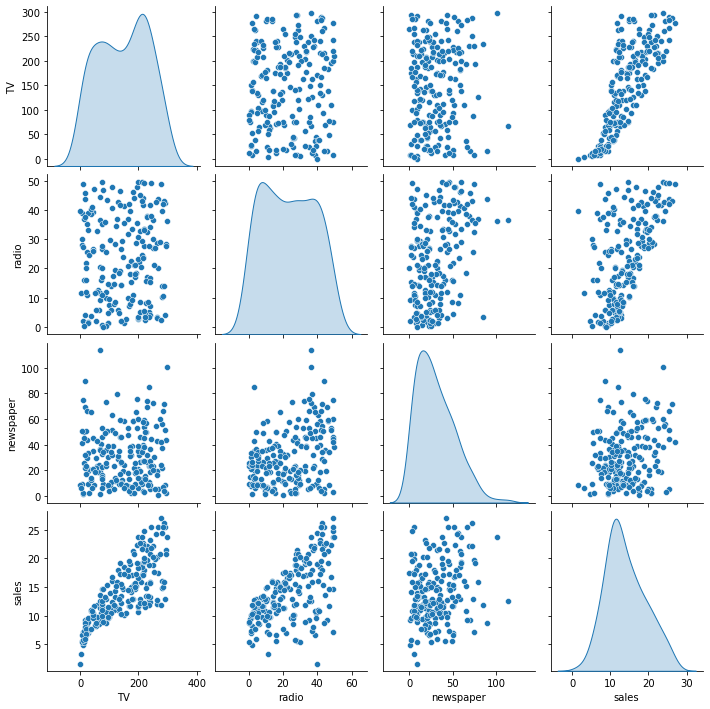

In [5]:
# Relation entre les features
sns.pairplot(df,diag_kind='kde');

## Introduction à SciKit Learn

Nous allons beaucoup travailler avec la bibliothèque scitkit learn, alors mettez-vous à l'aise avec la syntaxe de son modèle estimateur, et explorez sa documentation incroyablement utile !

In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

## Répartition Train | Test

Assurez-vous d'avoir regardé les vidéos de présentation de Machine Learning sur l'apprentissage supervisé pour comprendre pourquoi nous procédons à cette étape.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [10]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [11]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [12]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Création d'un modèle (Estimator)

### Importer une classe de modèle à partir d'une famille de modèles



In [13]:
from sklearn.linear_model import LinearRegression

### Créer une instance du modèle avec des paramètres

In [14]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [15]:
model = LinearRegression()

### Ajuster/Entraîner le modèle sur les données d'entraînement

**Assurez-vous de n'ajuster que sur les données d'entraînement, afin d'évaluer équitablement les performances de votre modèle sur les données futures**.

In [16]:
model.fit(X_train,y_train)

LinearRegression()

# Compréhension et Utilisation du Modèle

## Évaluation sur l'ensemble de test

### Metrics

Assurez-vous d'avoir visionné la vidéo sur ces metrics / mesures !
Les trois metrics d'évaluation les plus courantes pour les problèmes de régression :

**Mean Absolute Error** (MAE) est la moyenne de la valeur absolue des erreurs :

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) est la moyenne des erreurs quadratiques:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) est la racine carrée de la moyenne des erreurs au carré:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparaison de ces metrics :

- **MAE** est la plus facile à comprendre, car il s'agit de l'erreur moyenne.
- **MSE** est plus populaire que MAE, car MSE "punit" les erreurs plus importantes, ce qui tend à être utile dans le monde réel.
- **RMSE** est encore plus populaire que MSE, car RMSE est interprétable dans les mêmes unités que "y".

Toutes ces fonctions sont des **fonctions de perte**, car nous voulons les minimiser.

### Calcul de la performance sur l'ensemble de test

Nous voulons évaluer notre modèle de manière équitable, et nous obtenons donc des metrics de performance sur l'ensemble de test (données que le modèle n'a jamais vues auparavant).

In [17]:
# X_test

In [18]:
# On ne passe que les features de test
# Le modèle prédit son propre y chapeau
# Nous pouvons ensuite comparer ces résultats à la vraie valeur de l'étiquette y test.
test_predictions = model.predict(X_test)

In [19]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [22]:
MAE

1.2137457736144805

In [23]:
MSE

2.2987166978863787

In [24]:
RMSE

1.5161519375993882

In [25]:
df['sales'].mean()

14.022500000000003

**Consultez notre vidéo pour savoir si ces valeurs sont "suffisamment bonnes".**

## Résidus

Revoir le [quatuor d'Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">


<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

In [26]:
quartet = pd.read_csv('anscombes_quartet1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'anscombes_quartet1.csv'

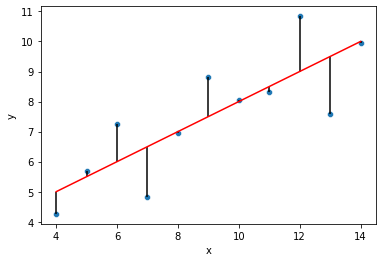

In [ ]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual']);

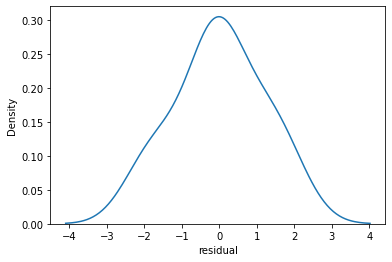

In [ ]:
sns.kdeplot(quartet['residual']);

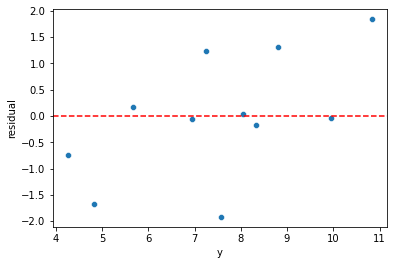

In [ ]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--');



---




In [ ]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [ ]:
quartet.columns = ['x','y']

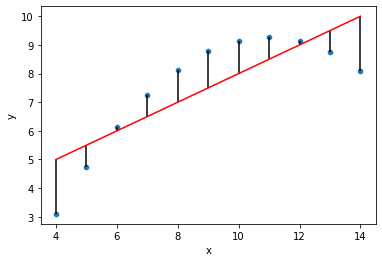

In [ ]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual']);

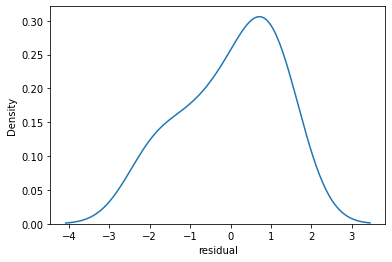

In [ ]:
sns.kdeplot(quartet['residual']);

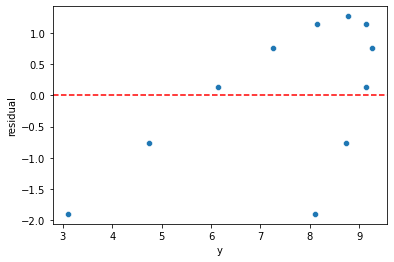

In [ ]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--');

---

In [ ]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [ ]:
quartet

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47
5,8.0,7.04
6,8.0,5.25
7,19.0,12.50
8,8.0,5.56
9,8.0,7.91


In [ ]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [ ]:
quartet['residual'] = quartet['y'] - quartet['pred_y']

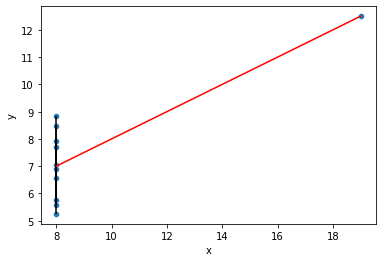

In [ ]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual']);

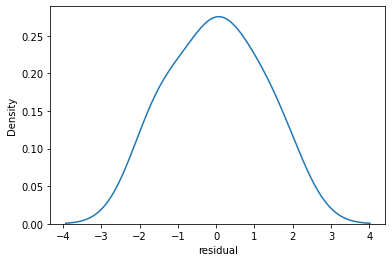

In [ ]:
sns.kdeplot(quartet['residual']);

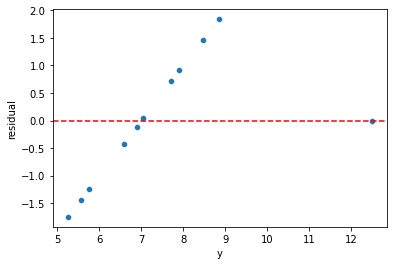

In [ ]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--');

### Tracer les résidus

Il est également important de tracer les résidus et de vérifier la distribution normale, ce qui nous aide à comprendre si la régression linéaire était un choix de modèle valide.

In [ ]:
# Prédictions sur les ensembles d'entraînement et de test
# Faire les résidus séparément nous alertera sur tout problème avec l'appel fractionné.
test_predictions = model.predict(X_test)

In [ ]:
# Si notre modèle était parfait, ces chiffres seraient tous des zéros.
test_res = y_test - test_predictions

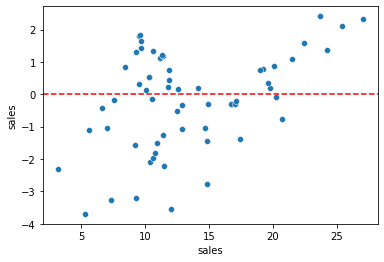

In [ ]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--');

In [ ]:
len(test_res)

60

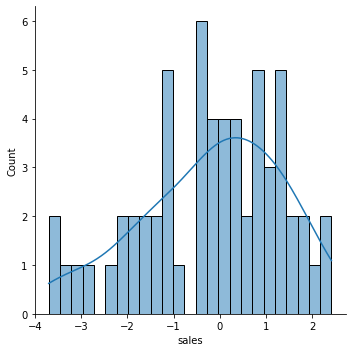

In [ ]:
sns.displot(test_res,bins=25,kde=True);

Vous n'êtes toujours pas sûr que la normalité soit une approximation raisonnable ? Nous pouvons vérifier par rapport au [tracé de probabilité normale](https://en.wikipedia.org/wiki/Normal_probability_plot) - [Droite de Henry en français](https://fr.wikipedia.org/wiki/Droite_de_Henry).

In [ ]:
import scipy as sp

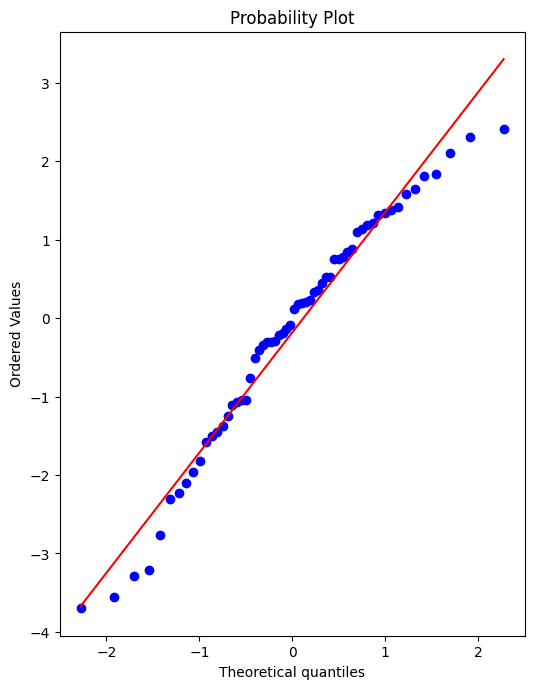

In [ ]:
# Créez une figure et un axe pour le tracé
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot renvoie les valeurs brutes si nécessaire
# nous voulons juste voir le graphique, donc nous assignons ces valeurs à _
_ = sp.stats.probplot(test_res,plot=ax)

## Ré-entraînement du modèle sur les données complètes

Si nous sommes satisfaits de la performance sur les données de test, avant de déployer notre modèle dans le monde réel, nous devons effectuer un ré-entraînement sur toutes nos données. (Si nous n'étions pas satisfaits, nous pourrions mettre à jour les paramètres ou choisir un autre modèle, ce dont nous parlerons plus tard).

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression()

Notez qu'il n'est pas vraiment utile de recalculer les metrics RMSE ici, puisque le modèle a déjà vu toutes les données, ce n'est pas un jugement équitable des performances que de calculer l'erreur RMSE sur des données qu'il a déjà vues, d'où l'objectif de l'examen précédent des performances de l'ensemble de test.

## Déploiement, prédictions et attributs du modèle

### Ajustement final du modèle

Notez que nous pouvons seulement faire ceci

In [ ]:
y_hat = final_model.predict(X)

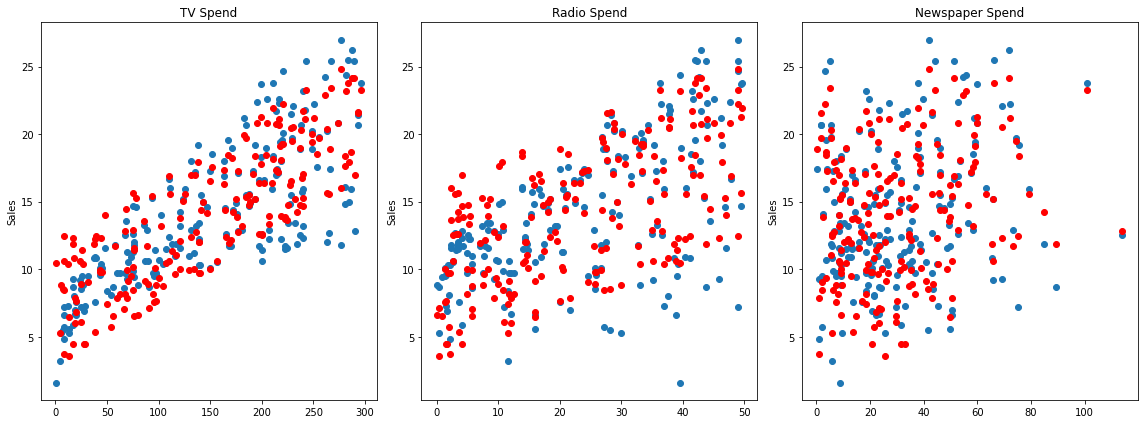

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Résiduels

Doit être normalement distribué comme indiqué dans la vidéo.

In [ ]:
residuals = y_hat - y

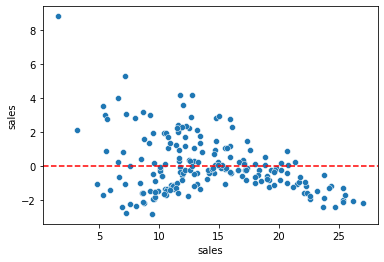

In [ ]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--');

### Coefficients

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interprétation des coefficients :

---
* Toutes les autres features étant fixes, une augmentation de 1 unité (1 000 dollars) des dépenses publicitaires TV est associée à une augmentation des ventes de 0,045 "unités de vente", dans ce cas des milliers d'unités.
* Cela signifie essentiellement que pour chaque 1000 dollars dépensés en publicités télévisées, nous pouvons nous attendre à 45 unités vendues en plus.
---

---
* En maintenant toutes les autres features fixes, une augmentation de 1 unité (1 000 dollars) des dépenses publoicitaires radio est associée à une augmentation des ventes de 0,188 "unités de vente", dans ce cas des milliers d'unités.
* Cela signifie que pour chaque 1000 dollars dépensés en publicité radio, on peut s'attendre à ce que 188 unités supplémentaires soient vendues.
---

---
* En gardant toutes les autres features fixes, une augmentation de 1 unité (1 000 dollars) des dépenses publicitaires dans les journaux est associée à une **diminution** des ventes de 0,001 "unités de vente", dans ce cas des milliers d'unités.
* Cela signifie que pour chaque 1000 dollars dépensés en publicité dans les journaux, on peut s'attendre à vendre 1 unité de moins. Étant si proche de 0, cela implique fortement que les dépenses en journaux n'ont aucun effet réel sur les ventes.
---

**Note ! Dans ce cas, toutes nos unités étaient les mêmes pour chaque feature / caractéristique (1 unité = 1000 $ de dépenses publicitaires). Mais dans d'autres ensembles de données, les unités peuvent ne pas être les mêmes. Par exemple, un ensemble de données sur le logement pourrait essayer de prédire un prix de vente avec une caractéristique relative au nombre de chambres à coucher et une caractéristique relative à la surface totale, comme la superficie en mètres carrés. Dans ce cas, il serait plus logique de *normaliser* les données, afin de pouvoir comparer clairement les caractéristiques et les résultats. Nous aborderons la normalisation plus tard.**

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prédiction sur de nouvelles données

Rappelez-vous, l'ensemble de données X_test ressemble *exactement* aux nouvelles données, donc nous devons simplement appeler .predict() comme avant pour prédire les ventes d'une nouvelle campagne publicitaire.

**Notre prochaine campagne publicitaire aura une dépense totale (en dollars) de 149 000 à la télévision, 22 000 à la radio et 12 000 dans les journaux. Combien d'unités pouvons-nous espérer vendre grâce à cette campagne ?**

In [ ]:
X_cols = X.columns

In [ ]:
ads_values = [[149,22,12]]

In [ ]:
campaign = pd.DataFrame(data=ads_values,columns=X_cols)

In [ ]:
campaign

,TV,radio,newspaper
0,149,22,12


In [ ]:
final_model.predict(campaign)

array([13.893032])

**Dans quelle mesure cette prédiction est-elle exacte ? Aucun moyen réel de le savoir ! Nous ne connaissons réellement que les performances de notre modèle sur les données de test, c'est pourquoi nous devions d'abord en être satisfaits, avant d'entraîner notre modèle complet.**

## Persistance du modèle (sauvegarde et chargement d'un modèle)

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [ ]:
loaded_model = load('sales_model.joblib')

In [ ]:
loaded_model.predict(campaign)

array([13.893032])

#### **À suivre...**
**Est-ce la meilleure performance possible ? C'est encore un modèle simple, développons le modèle de régression linéaire en examinant de plus près la régularisation !**